In [1]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/Gaelim/Clinic_Analysis_Pandas/master/hospital_data.csv')

## Explore Data
We will explore native functions and the dataset

In [2]:
data.head(10)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005
5,11/4/2019 0:00,$586.80,$-,$13.00,LOCUM,INSURANCE,OUTPATIENT,19:22:09,20:14:03,20:15:03,DR64040I4,C10006
6,11/13/2019 0:00,$570.18,$92.50,$15.00,ANCHOR,INSURANCE,OUTPATIENT,9:14:45,10:51:01,10:51:33,DR15154H4,C10007
7,11/2/2019 0:00,$493.85,$-,$30.00,FLOATING,INSURANCE,OUTPATIENT,10:35:00,10:57:26,10:57:36,DR60065B4,C10008
8,11/4/2019 0:00,$470.39,$-,$35.52,ANCHOR,HMO,OUTPATIENT,8:47:59,9:59:22,9:59:29,DR15154H4,C10009
9,11/2/2019 0:00,$468.02,$10.00,$23.91,LOCUM,HMO,OUTPATIENT,10:01:25,10:32:38,10:35:17,DR04556Z4,C10010


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1    Medication Revenue     29999 non-null  object
 2     Lab Cost              29999 non-null  object
 3    Consultation Revenue   29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [4]:
data.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [5]:
#clean the spaces in the column headings
data.columns =['Date', 'Medication Revenue ', 'Lab Cost ', 'Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID']

In [6]:
data.columns = data.columns.str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1   Medication Revenue      29999 non-null  object
 2   Lab Cost                29999 non-null  object
 3   Consultation Revenue    29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [7]:
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


# Create Cleaning Function

In [8]:
def clean_text(x):
    x = x.replace('$','')
    x = x.replace('-','')
    x = x.replace(',','')
    x = x.replace(' ','')
    x = pd.to_numeric(x)
    return x
    

In [9]:
clean_text('$1,183.22')

1183.22

In [10]:
data['Medication Revenue']=data['Medication Revenue'].apply(clean_text)
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,1183.22,$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [11]:
data['Lab Cost']=data['Lab Cost'].apply(clean_text)
data['Consultation Revenue']=data['Consultation Revenue'].apply(clean_text)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    29999 non-null  object 
 1   Medication Revenue      18062 non-null  float64
 2   Lab Cost                1433 non-null   float64
 3   Consultation Revenue    24423 non-null  float64
 4   Doctor Type             29999 non-null  object 
 5   Financial Class         29999 non-null  object 
 6   Patient Type            29999 non-null  object 
 7   Entry Time              29999 non-null  object 
 8   Post-Consultation Time  29999 non-null  object 
 9   Completion Time         29999 non-null  object 
 10  Doctor                  29999 non-null  object 
 11  Patient ID              29999 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.7+ MB


In [12]:
data = data.fillna(0)

In [13]:
data['Total Revenue'] = data['Medication Revenue']+data['Lab Cost']+data['Consultation Revenue']

In [14]:
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60


In [15]:
#create a quick get hour function 
def get_hour(x):
    x= pd.to_datetime(x)
    x = x.hour
    return x

In [16]:
# create entry hour
data['Entry Hour']= data['Entry Time'].apply(get_hour)

In [17]:
# create other hours
data['Post Consulation Hour'] = data['Post-Consultation Time'].apply(get_hour)
data['Completion Hour'] = data['Completion Time'].apply(get_hour)
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour,Post Consulation Hour,Completion Hour
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39,8,9,9
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48,19,21,21
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17,10,11,12
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00,9,10,10
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60,11,12,12


In [18]:
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour,Post Consulation Hour,Completion Hour
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39,8,9,9
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48,19,21,21
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17,10,11,12
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00,9,10,10
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60,11,12,12


# Visualize Our Results

The organization wants to see a heatmap of when the clinic recieves the most patients and revenue.

In [19]:
# create days of the week
data['Date'] = pd.to_datetime(data['Date'])
data['dayofweek'] = data['Date'].dt.dayofweek
data['weekday name']= data['Date'].dt.strftime('%A')
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour,Post Consulation Hour,Completion Hour,dayofweek,weekday name
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39,8,9,9,0,Monday
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48,19,21,21,2,Wednesday
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17,10,11,12,5,Saturday
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00,9,10,10,2,Wednesday
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60,11,12,12,4,Friday


In [20]:
# import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [21]:
data.groupby('weekday name')['Total Revenue'].sum().sort_values()

weekday name
Thursday      97480.16
Sunday       111779.72
Saturday     124407.67
Wednesday    156197.58
Friday       177569.50
Tuesday      209864.37
Monday       266648.00
Name: Total Revenue, dtype: float64

<AxesSubplot:xlabel='weekday name', ylabel='Total Revenue'>

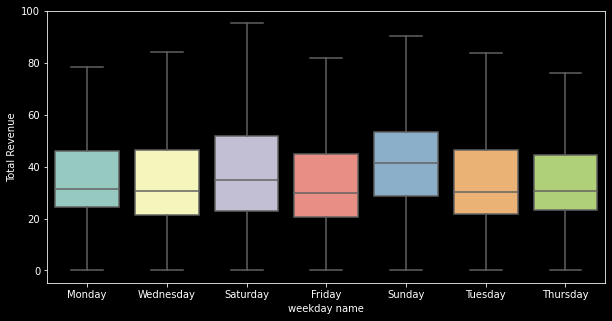

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='weekday name',y='Total Revenue',showfliers=False)

<AxesSubplot:xlabel='weekday name', ylabel='Total Revenue'>

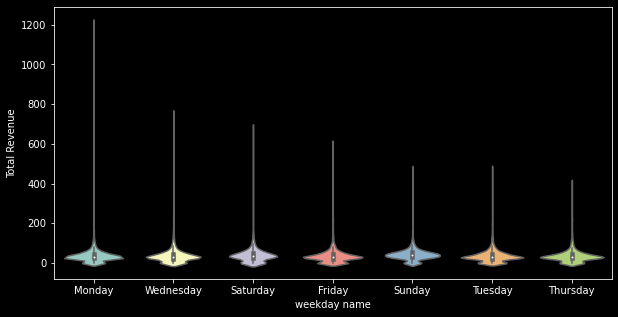

In [23]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data, x='weekday name',y='Total Revenue')

<AxesSubplot:ylabel='Entry Hour'>

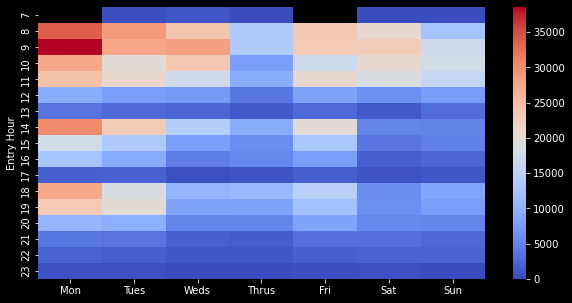

In [24]:
# create pivot table
plt.figure(figsize=(10,5))
pivot = pd.pivot_table(data, index='Entry Hour', columns='dayofweek',values='Total Revenue',aggfunc='sum')
pivot.columns = ['Mon','Tues','Weds','Thrus','Fri','Sat','Sun']
sns.heatmap(pivot,cmap='coolwarm')

<AxesSubplot:ylabel='Entry Hour'>

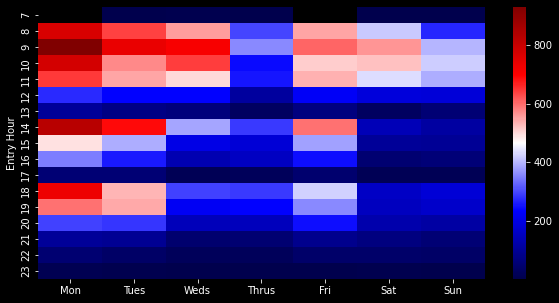

In [25]:
# create pivot table
plt.figure(figsize=(10,5))
pivot = pd.pivot_table(data, index='Entry Hour', columns='dayofweek',values='Patient ID',aggfunc='count')
pivot.columns = ['Mon','Tues','Weds','Thrus','Fri','Sat','Sun']
sns.heatmap(pivot,cmap='seismic')

C:\Users\Gaelim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dayofweek', ylabel='Entry Hour'>

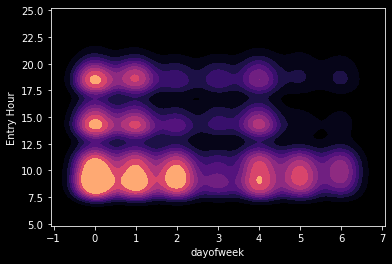

In [26]:
sns.kdeplot(data['dayofweek'],data['Entry Hour'],fill=True,cmap='magma')

C:\Users\Gaelim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dayofweek', ylabel='Entry Hour'>

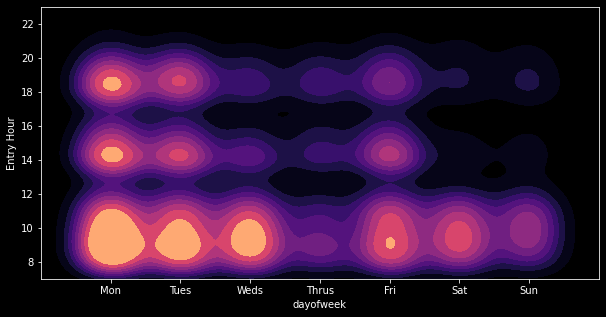

In [27]:
plt.figure(figsize=(10,5))
plt.xlim(-1,7)
plt.ylim(7,23)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tues','Weds','Thrus','Fri','Sat','Sun'])
sns.kdeplot(data['dayofweek'],data['Entry Hour'],fill=True,cmap='magma')

# Cleaned Dataset

In [28]:
data.to_csv('cleaned_clinic_data.csv')

In [ ]:
condition[data['Doctor']]

In [ ]:


plt.figure(figsize=(10,5))
plt.xlim(-1,7)
plt.ylim(7,23)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tues','Weds','Thrus','Fri','Sat','Sun'])
sns.kdeplot(data['dayofweek'],data['Entry Hour'],fill=True,cmap='magma')